<a href="https://colab.research.google.com/github/PedroFlorencioNeto/use-of-force-seattle/blob/main/ProjetoSeattle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
### <b> Seleção para Bolsa de Inovação Tecnológica - Estudo do Uso da Força pela Polícia de Seattle </b> 

Este notebook é resultado do estudo que será avaliado pelo Programa Cientista Chefe no âmbito de seleção para a Bolsa de Inovação Tecnológica no Grupo de Redes de Computadores Engenharia de Software e Sistemas (GREat) da Universidade Federal do Ceará. Os dados são de ocorrências de uso da força pelas autoridades policiais de Seattle, os quais são públicos e [disponibilizados](https://www.seattle.gov/police/information-and-data/use-of-force-data/use-of-force-dataset) pelo site do governo da cidade.

<b>Links:</b>

[Dataset](https://drive.google.com/file/d/1XEZI0_L62hX8GFklbh-IIUdKHmGrjo0H/view)

[Governo de Seattle](https://www.seattle.gov/)
<br>
<br>
<b>Autor:</b>
<br>
Pedro Florencio de Almeida Neto
<br>
Graduando de Engenharia Elétrica - Universidade Federal do Ceará (UFC)
<br>
[WhatsApp](https://wa.me/5585996415367?text=Ol%C3%A1%2C+Pedro%21+Gostaria+de+conversar+a+respeito+do+projeto+que+voc%C3%AA+submeteu+na+Sele%C3%A7%C3%A3o+Programa+Cientista+Chefe+para+Bolsa+de+Inova%C3%A7%C3%A3o+Tecnol%C3%B3gica) | [Linkedin](https://www.linkedin.com/in/pedroflorencioneto/) | [Github](https://github.com/PedroFlorencioNeto)
<br>
<br>
<i>Fortaleza, 11 de julho de 2022</i>

---
<br>



#### <b> 1. Introdução </b>

A cidade de Seattle é a mais populosa do estado americano de Washington, contando com cerca de 574.000 habitantes de uma área de 369 km². Como toda cidade grande, sofre com seus problemas de violência e criminalidade. Em 2021, crimes com alto grau de violência cresceram 20% em relação ao ano de 2020. Recentemente, o que também chamou a atenção do mundo, foi a violência policial contra pessoas negras nos Estados Unidos, desencadeando protestos inclusive no Brasil. Com o objetivo de tornar transparente a política de uso da força, buscando manter a confiança do público, desde 2014 o Departamento de Polícia de Seattle monitora todos os incidentes de uso de força. O presente estudo busca investigar os dados disponibilizados na plataforma do governo de Seattle para a análise do comportamento destes incidente ao longos dos anos que os dados foram disponibilizados. Os dados são compostos informações que identificam o horário da ocorrência do uso da força, as pessoas envolvidas para cada Sector, Precint e Beats. Estes termos designam as regiões estratégicas da cidade (Figura 01). Seattle é dividida em 5 áreas geográficas que estão presentes 5 Precincts (Delegacias): North, West, East, South e Southwest. Cada uma das 5 áreas possuem áreas menores chamadas de Sectors (setores). São 17 no total. Cada setor é composto por 3 Beats, representandos por uma letra e um número.


Figura 01: Regiões de Seattle

![](https://drive.google.com/uc?export=view&id=14uWakN5r4PQQg1amty8Mat4Av0H66lC5)

Referências:

[Política do Uso da Força pelo Departamento de Polícia de Seattle](https://www.seattle.gov/police-manual/title-8---use-of-force/8000---use-of-force-core-principles)

[Relatório da Criminalidade em Seattle em 2021](https://www.seattle.gov/documents/Departments/Police/Reports/2021_SPD_CRIME_REPORT_FINAL.pdf)



#### <b> 2. Objetivos </b>

1️⃣ Realizar a Análise Exploratória dos Dados com o objetivo de observar a distribuição dos incidentes no tempo, e avaliar tendências, sazonalidade e/ou picos ao longos de diferentes períodos de tempo;

2️⃣ Analisar o percentual de casos reincidentes em relação ao total de incidentes em cada setor e verifique se há correlação entre esta métrica e o percentual de incidentes “Level 2”;

3️⃣ Comparação de modelos de Aprendizado Supervisionado para classificação do nível do uso da força policial empregado em uma ocorrência. Modelos que serão testados: Decision Trees e Support Vector Machines (SVM);

4️⃣ Uso de técnicas de balanceamento de dados para buscar um melhor desempenho na classificação do nível do uso da força policial empregado em uma ocorrência.


#### <b> 3. Análise Exploratória dos Dados</b>

Esta etapa consiste em analisar e entender o dataset, buscando uma compreensão do problema proposto. Iremos realizar:

* Importação das bibliotecas de análise, visualização e tratamento dos dados;
* Investigação das principais informações do dataset;
* Verificação de como os dados se distribuem;
* Identificação dos dados ausentes.

##### <b> 3.1 Importação das bibliotecas

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

##### <b> 3.2 Entrada dos dados

In [115]:
# Endereço do Dataset
url = 'https://drive.google.com/file/d/1XEZI0_L62hX8GFklbh-IIUdKHmGrjo0H/view'

# Adequação da URL
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]

df = pd.read_csv(url)
df.head(10)

,ID,Incident_Num,Incident_Type,Occured_date_time,Precinct,Sector,Beat,Officer_ID,Subject_ID,Subject_Race,Subject_Gender
0,2014UOF-0001-1377-203,251,Level 1 - Use of Force,06/07/2014 12:09:00 AM,East,CHARLIE,C2,1594,203,Black or African American,Male
1,2014UOF-0002-1098-166,218,Level 1 - Use of Force,05/30/2014 02:06:00 PM,East,GEORGE,G1,1673,166,White,Male
2,2014UOF-0003-1031-125,178,Level 1 - Use of Force,05/23/2014 05:24:00 PM,West,KING,K3,1690,125,Asian,Female
3,2014UOF-0004-767-126,179,Level 1 - Use of Force,05/26/2014 12:10:00 AM,East,EDWARD,E2,953,126,Black or African American,Male
4,2014UOF-0005-1473-172,223,Level 1 - Use of Force,06/01/2014 04:03:00 PM,South,ROBERT,R1,1145,172,Black or African American,Male
5,2014UOF-0006-1216-178,229,Level 1 - Use of Force,06/02/2014 05:08:00 AM,West,KING,K1,1783,178,Not Specified,Male
6,2014UOF-0007-810-191,240,Level 1 - Use of Force,06/04/2014 10:10:00 PM,East,GEORGE,G3,694,191,Not Specified,Female
7,2014UOF-0008-1178-205,254,Level 1 - Use of Force,06/07/2014 03:05:00 AM,West,KING,K3,1662,205,Black or African American,Male
8,2014UOF-0009-1464-191,239,Level 1 - Use of Force,06/04/2014 10:07:00 PM,East,GEORGE,G3,1141,191,Not Specified,Female
9,2014UOF-0010-1311-204,253,Level 1 - Use of Force,06/07/2014 03:05:00 AM,West,KING,K3,1622,204,Black or African American,Male


###### <b> 3.2.1  Informação sobre tipos das colunas

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14264 entries, 0 to 14263
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 14264 non-null  object
 1   Incident_Num       14264 non-null  int64 
 2   Incident_Type      14264 non-null  object
 3   Occured_date_time  14264 non-null  object
 4   Precinct           14264 non-null  object
 5   Sector             13313 non-null  object
 6   Beat               14264 non-null  object
 7   Officer_ID         14264 non-null  int64 
 8   Subject_ID         14264 non-null  int64 
 9   Subject_Race       14264 non-null  object
 10  Subject_Gender     14264 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.2+ MB


###### <b> 3.2.2  Dicionário dos dados

> O dataset é composto por uma amostra de 14264 ocorrências e 11 features que representam:

<b>ID:</b> Chave composta para a identificação do uso da força

<b>Incident_Num:</b> Chave que identifica um incidente de força

<b>Incident_Type:</b> Classificação do nível de força

<b>Occured_date_time:</b> Data e horário do uso da força

<b>Precinct:</b> Delegacia onde houve o uso da força

<b>Sector:</b> Setor onde ocorreu o uso da força

<b>Beat:</b> Beat onde ocorreu o uso da força

<b>Officer_ID:</b> Chave de identificação do policial

<b>Subject_ID:</b> Chave de identificação do civil

<b>Subject_Race:</b> Etnia do civil


<b>Subject_Gender:</b> Gênero do civil


##### <b> 3.3 Valores Ausentes

Primeiramente, verifica-se a presença de valores ausentes nas colunas preenchidos por NaN. Depois, busca-se por dados inseridos que são incongruentes com o domínio da coluna analisada.

###### <b> 3.3.1 Valores ausentes representados por NaN </b>

<Figure size 1080x720 with 0 Axes>

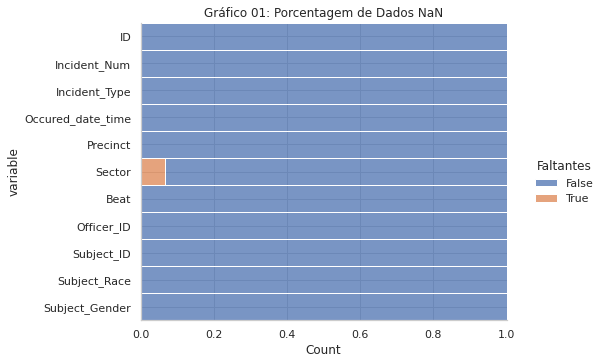

In [117]:
sns.set_theme(style="whitegrid")

# Plot da porcentagem dos valores NaN
plt.figure(figsize=(15,10))
sns.displot(
    data=df.isna().melt(value_name="Faltantes"),
    y="variable",
    hue="Faltantes",
    multiple="fill",
    aspect=1.5
)
plt.title('Gráfico 01: Porcentagem de Dados NaN')
plt.show()

> A cor laranja representa os dados NaN.

In [118]:
qtde_faltantes_sector = df['Sector'].isna().sum()
porcentagem_faltantes_sector = df['Sector'].isna().sum()/len(df)*100

print('Há {} setores NaN no dataset, que representam {}% do total dos dados faltantes'.format(qtde_faltantes_sector,
                                                                                                        round(porcentagem_faltantes_sector, 2)))

Há 951 setores NaN no dataset, que representam 6.67% do total dos dados faltantes


###### <b> 3.3.2 Valores ausentes não representados por NaN </b>

Uma função que investiga os rol de valores presentes em cada uma das colunas é necessária para verificar dados incoerentes, que acabam atuando como missing values não identificados.

In [119]:
def buscaAusentes(df):
  # Cria dataframe apenas com colunas do dataset que são do tipo inteiro e object
  df_colunas_int = df.select_dtypes(include='number')
  df_colunas_str = df.select_dtypes(include='object')
  
  # Verifica os valores máximos e mínimos das colunas de inteiros e os valores que não se repetem da colunas com variáveis categóricas
  for coluna in df_colunas_int.columns:
    print('Coluna: {} | Valor máximo: {} | Valor mínimo: {}'.format(coluna, df[coluna].max(), df[coluna].min()))

  for coluna in df_colunas_str.columns:
    print('\nColuna: {} | Valores únicos: {}\n'.format(coluna, df[coluna].unique()))

buscaAusentes(df)

Coluna: Incident_Num | Valor máximo: 68122 | Valor mínimo: 178
Coluna: Officer_ID | Valor máximo: 6046 | Valor mínimo: 7
Coluna: Subject_ID | Valor máximo: 29302 | Valor mínimo: 4

Coluna: ID | Valores únicos: ['2014UOF-0001-1377-203' '2014UOF-0002-1098-166' '2014UOF-0003-1031-125'
 ... '2022UOF-0387-2614-15793' '2022UOF-0388-2670-15793'
 '2022UOF-0389-2739-8294']


Coluna: Incident_Type | Valores únicos: ['Level 1 - Use of Force' 'Level 2 - Use of Force'
 'Level 3 - Use of Force' 'Level 3 - OIS']


Coluna: Occured_date_time | Valores únicos: ['06/07/2014 12:09:00 AM' '05/30/2014 02:06:00 PM'
 '05/23/2014 05:24:00 PM' ... '05/24/2022 08:51:00 PM'
 '05/24/2022 08:52:00 PM' '04/19/2022 09:02:00 PM']


Coluna: Precinct | Valores únicos: ['East' 'West' 'South' 'North' 'Southwest' 'X' '-' '0' 'OOJ']


Coluna: Sector | Valores únicos: ['CHARLIE' 'GEORGE' 'KING' 'EDWARD' 'ROBERT' 'SAM' 'LINCOLN' 'UNION'
 'DAVID' 'FRANK' 'JOHN' 'NORA' nan 'BOY' 'OCEAN' 'QUEEN' 'WILLIAM' 'MARY']


Coluna: Beat 

Pode-se observar que há valores ausentes não representados por NaN nas colunas Precinct e Beat. Além disso, na coluna Subject_Gender nota-se que será necessário uma substituição de variáveis categóricas, pois há repetição de termos, como por exemplo 'm' e 'male'.

###### <b>3.3.3 Substituindo os valores ausentes despadronizados por NaN</b>

O tratamento dos dados faltantes será realizado na etapa de pré-processamento, ao preparar o dataset para os modelos de classificação. Neste ponto, será realizada apenas a substituição dos valores encontrados na célula anterior por NaN, para verificar-se o real impacto dos missing values em relação a todo o conjunto de dados.

In [120]:
# Dados da coluna Precinct
df['Precinct'].loc[df.Precinct=='X'] = np.nan
df['Precinct'].loc[df.Precinct=='-'] = np.nan
df['Precinct'].loc[df.Precinct=='0'] = np.nan
df['Precinct'].loc[df.Precinct=='OOJ'] = np.nan

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [121]:
# Dados da coluna Beat
df['Beat'].loc[df.Beat=='99'] = np.nan
df['Beat'].loc[df.Beat=='-'] = np.nan
df['Beat'].loc[df.Beat=='0'] = np.nan
df['Beat'].loc[df.Beat=='XX'] = np.nan

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [122]:
# Dados da coluna Subject_Gender
df['Subject_Gender'].loc[df.Subject_Gender=='Unknown'] = np.nan
df['Subject_Gender'].loc[df.Subject_Gender=='-'] = np.nan
df['Subject_Gender'].loc[df.Subject_Gender=='m'] = 'Male'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


###### <b>3.3.4 Substituindo os valores ausentes despadronizados por NaN</b>

Agora, com todos os dados ausentes identificados, verifica-se o percentual destes dados com relação ao dataset.

<Figure size 1080x720 with 0 Axes>

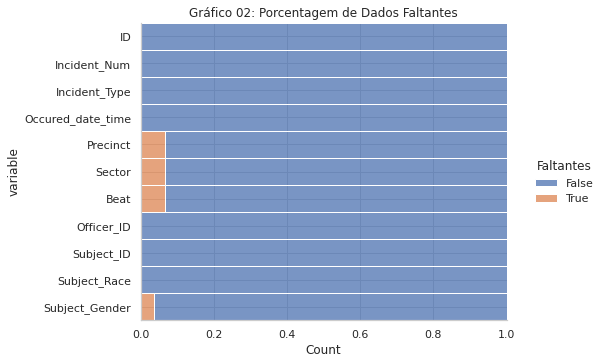

In [123]:
# Plot dos dados faltantes em todas as colunas

sns.set_theme(style="whitegrid")

plt.figure(figsize=(15,10))
sns.displot(
    data=df.isna().melt(value_name="Faltantes"),
    y="variable",
    hue="Faltantes",
    multiple="fill",
    aspect=1.5
)
plt.title('Gráfico 02: Porcentagem de Dados Faltantes')
plt.show()

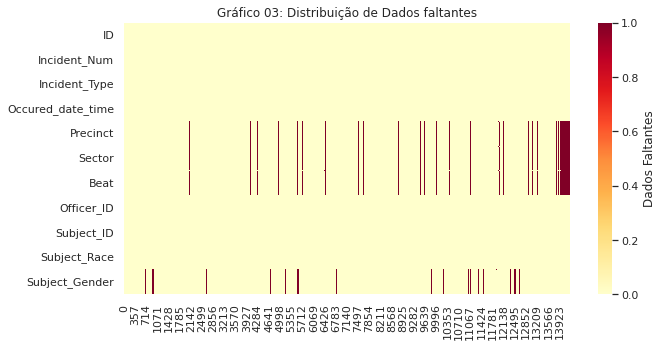

In [124]:
# Plot da região dos dados faltantes

plt.figure(figsize=(10,5))
plt.title('Gráfico 03: Distribuição de Dados faltantes')
sns.heatmap(df.isna().transpose(),
            cmap='YlOrRd',
            cbar_kws={'label':'Dados Faltantes'})
plt.show()

In [125]:
# Porcentagem de dados faltantes

round(df.isnull().sum()/len(df.index), 2)*100

ID                   0.0
Incident_Num         0.0
Incident_Type        0.0
Occured_date_time    0.0
Precinct             7.0
Sector               7.0
Beat                 7.0
Officer_ID           0.0
Subject_ID           0.0
Subject_Race         0.0
Subject_Gender       4.0
dtype: float64

> Observa-se que há dados faltantes que se referem ao gênero dos civis e localização da ocorrência. No Gráfico 03, é notável que não há dados de Beats que possam ajudar a completar dados ausentes de Sector e Precinct. Cerca de 7% dos dados de local e 4% dos dados de gênero estão faltando com relação ao dataset. 

##### <b> 3.4 Visualização dos Dados

Nesta etapa, alguns questionamentos são respondidos através gráficos. Além disso, são apresentadas as respostas das questões que representam os objetivos 1️⃣ e 2️⃣ apresentados no início do notebook. 

###### <b> 3.4.1 Qual a incidência dos diferentes níveis de força aplicados pelo Departamento de Polícia de Seattle desde 2014?

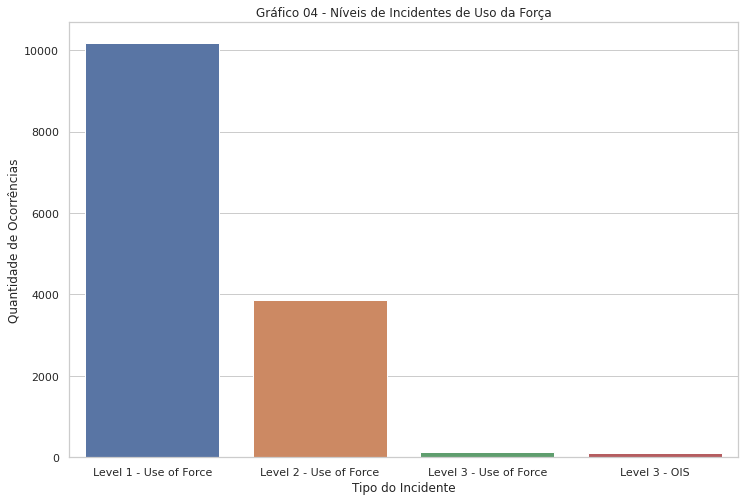

In [189]:
# Definição do estilo do gráfico
sns.set_theme(style="whitegrid")

# Definição do tamanho do gráfico
ax = plt.subplots(figsize=(12, 8))

# Distribuição dos dados de nível do uso de força
sns.countplot(x='Incident_Type', data=df)

# Customização do gráfico
plt.title('Gráfico 04 - Níveis de Incidentes de Uso da Força')
plt.xlabel('Tipo do Incidente')
plt.ylabel('Quantidade de Ocorrências')
sns.set_color_codes("pastel")

plt.show()

In [127]:
df['Incident_Type'].value_counts()

Level 1 - Use of Force    10173
Level 2 - Use of Force     3856
Level 3 - Use of Force      128
Level 3 - OIS               107
Name: Incident_Type, dtype: int64

> Observa-se que os momentos de uso da força "nível 3" e "nível 3 - OIS" (este último representando o uso de arma) são mais raros que os outros dois níveis.

###### <b> 3.4.2 Como é o comportamento dos níveis de uso de força por etnia?</b>

Este estudo pode indicar se há possíveis práticas racistas pelos oficiais da Polícia de Seattle.

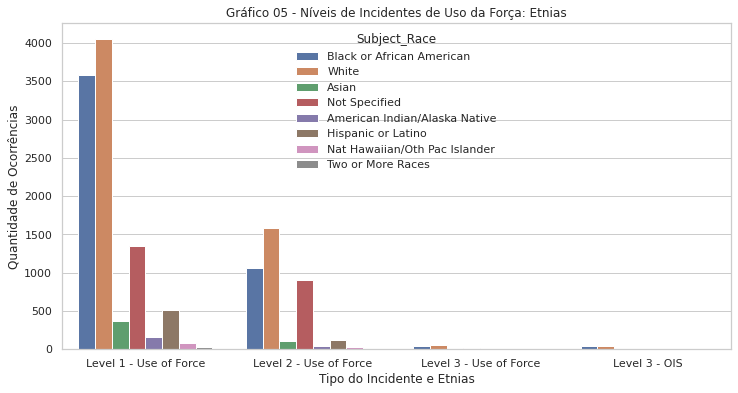

In [203]:
sns.set_theme(style="whitegrid")

# Definindo o tamanho do gráfico
ax = plt.subplots(figsize=(12, 6))

# Distribuição dos dados de nível do uso de força por etnia
sns.countplot(x='Incident_Type', data=df, hue='Subject_Race')

# Customização do gráfico
plt.title('Gráfico 05 - Níveis de Incidentes de Uso da Força: Etnias')
plt.xlabel('Tipo do Incidente e Etnias')
plt.ylabel('Quantidade de Ocorrências')
sns.set_color_codes("pastel")


plt.show()

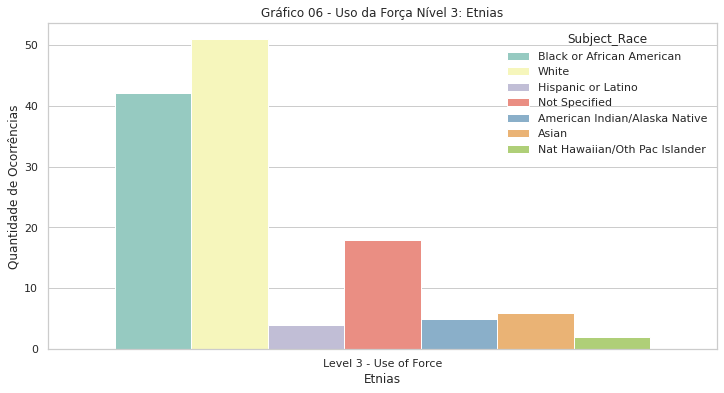

In [202]:
# Plot da aproximação no Nível 3 de uso da força
sns.set_theme(style="whitegrid")

df_level3_use = df[df['Incident_Type']=='Level 3 - Use of Force']


# Definindo o tamanho do gráfico
ax = plt.subplots(figsize=(12, 6))

# Distribuição dos dados de nível do uso de força por etnia
sns.countplot(x='Incident_Type', data=df_level3_use, hue='Subject_Race', palette='Set3')

# Customização do gráfico
plt.title('Gráfico 06 - Uso da Força Nível 3: Etnias')
plt.xlabel('Etnias')
plt.ylabel('Quantidade de Ocorrências')
sns.set_color_codes("pastel")

plt.show()

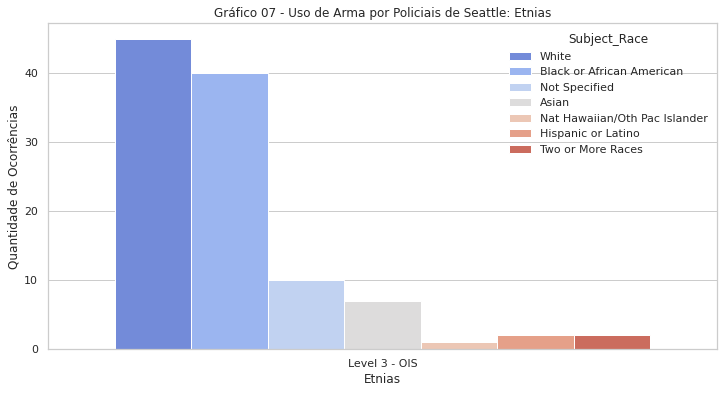

In [201]:
# Plot da aproximação no Nível 3 - OIS
sns.set_theme(style="whitegrid")

df_level3_ois = df[df['Incident_Type']=='Level 3 - OIS']


# Definindo o tamanho do gráfico
ax = plt.subplots(figsize=(12, 6))

# Distribuição dos dados de nível do uso de força por etnia
sns.countplot(x='Incident_Type', data=df_level3_ois, hue='Subject_Race', palette='coolwarm')

# Customização do gráfico
plt.title('Gráfico 07 - Uso de Arma por Policiais de Seattle: Etnias')
plt.xlabel('Etnias')
plt.ylabel('Quantidade de Ocorrências')
sns.set_color_codes("pastel")

plt.show()

> A distância entre quantidades de ocorrências de uso dos maiores níveis de força policial em civis negros ou afroamericanos é menor do que em níveis de menor uso de força. Uma investigação mais aprofundada deve ser realizada. Como trabalho futuro, sugere-se a análise de dados do [OIS Dataset](https://www.seattle.gov/police/information-and-data/use-of-force-data/ois-dataset) que contém as ocorrência de uso de arma pelos oficiais de Seattle. 

###### <b> 3.4.3 Como é o comportamento dos níveis de força por gênero?</b>

O mesmo estudo anterior é realizado neste tópico, agora buscando entender os padrões de ocorrências por gênero

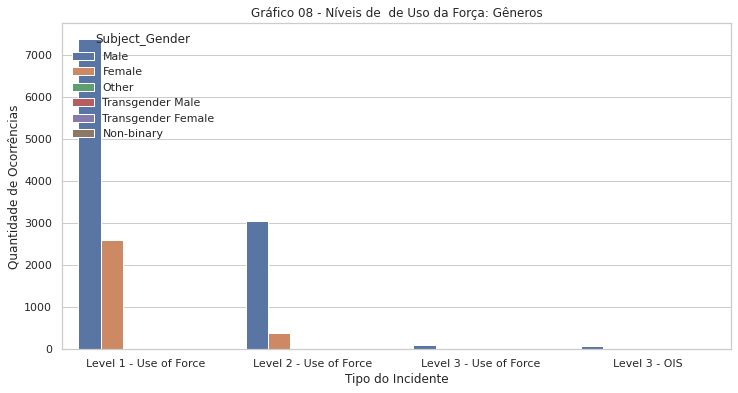

In [200]:
sns.set_theme(style="whitegrid")

# Definindo o tamanho do gráfico
ax = plt.subplots(figsize=(12, 6))

# Distribuição dos dados de nível do uso de força por etnia
sns.countplot(x='Incident_Type', data=df, hue='Subject_Gender')

# Customização do gráfico
plt.title('Gráfico 08 - Níveis de  de Uso da Força: Gêneros')
plt.xlabel('Tipo do Incidente')
plt.ylabel('Quantidade de Ocorrências')
sns.set_color_codes("pastel")

plt.show()

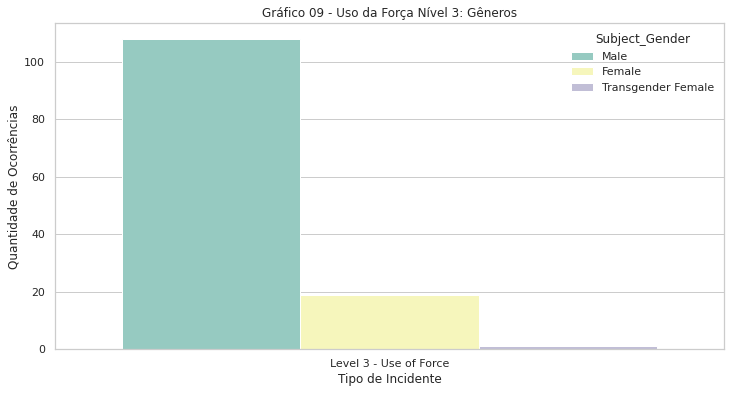

In [199]:
# Plot da aproximação no Nível 3 de uso da força
sns.set_theme(style="whitegrid")

df_level3_use = df[df['Incident_Type']=='Level 3 - Use of Force']


# Definindo o tamanho do gráfico
ax = plt.subplots(figsize=(12, 6))

# Distribuição dos dados de nível do uso de força por etnia
sns.countplot(x='Incident_Type', data=df_level3_use, hue='Subject_Gender', palette='Set3')

# Customização do gráfico
plt.title('Gráfico 09 - Uso da Força Nível 3: Gêneros')
plt.xlabel('Tipo de Incidente')
plt.ylabel('Quantidade de Ocorrências')
sns.set_color_codes("pastel")

plt.show()

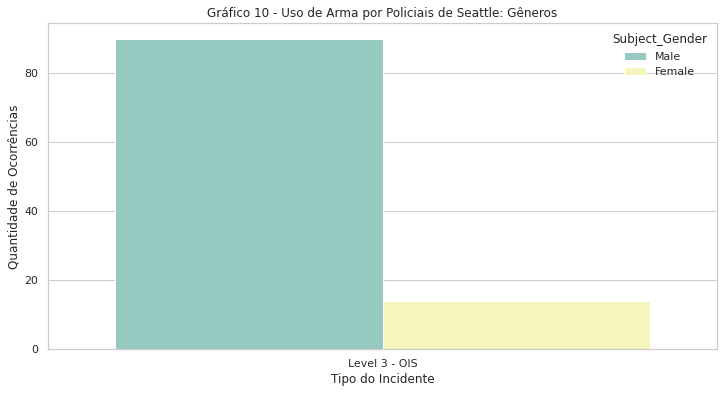

In [198]:
# Plot da aproximação no Nível 3 - OIS
sns.set_theme(style="whitegrid")

df_level3_ois = df[df['Incident_Type']=='Level 3 - OIS']


# Definindo o tamanho do gráfico
ax = plt.subplots(figsize=(12, 6))

# Distribuição dos dados de nível do uso de força por etnia
sns.countplot(x='Incident_Type', data=df_level3_ois, hue='Subject_Gender', palette='Set3')


# Customização do gráfico
plt.title('Gráfico 10 - Uso de Arma por Policiais de Seattle: Gêneros')
plt.xlabel('Tipo do Incidente')
plt.ylabel('Quantidade de Ocorrências')
sns.set_color_codes("pastel")

plt.show()

###### <b> 3.4.4 Como é a distribuição de dados por Precinct?</b>

O objetivo desta análise é observar se há Precincts em que há um maior número de uso da força, buscando posteriormente correlacionar se há de fato números maiores de casos em que se foi necessário o uso da força ou se há abuso de autoridade por oficiais de determinada região.

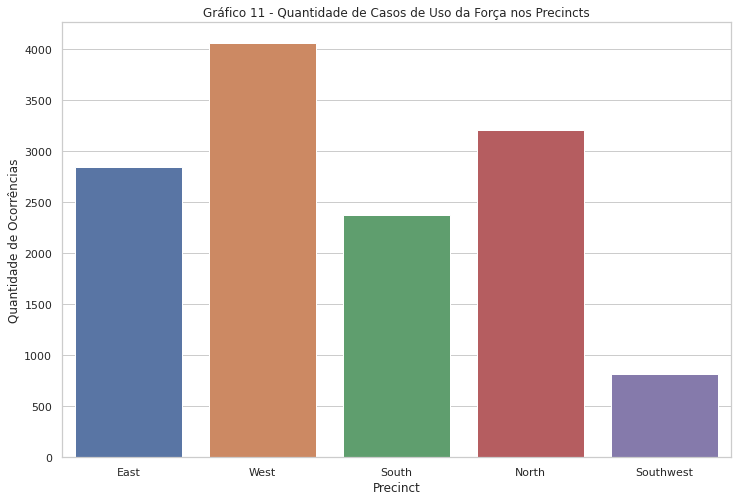

In [204]:
sns.set_theme(style="whitegrid")

# Definindo o tamanho do gráfico
ax = plt.subplots(figsize=(12, 8))

# Distribuição dos dados de nível do uso de força
sns.countplot(x='Precinct', data=df)

# Customização do gráfico
plt.title('Gráfico 11 - Quantidade de Casos de Uso da Força nos Precincts')
plt.xlabel('Precinct')
plt.ylabel('Quantidade de Ocorrências')
sns.set_color_codes("pastel")

plt.show()

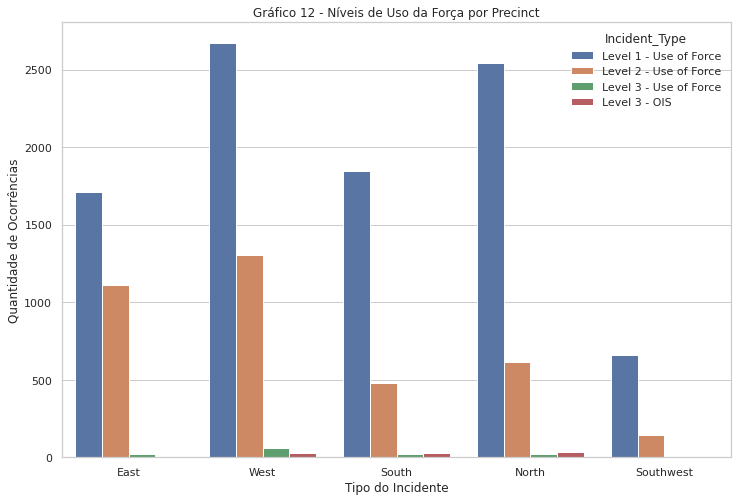

In [205]:
sns.set_theme(style="whitegrid")

# Definindo o tamanho do gráfico
ax = plt.subplots(figsize=(12, 8))

# Distribuição dos dados de nível do uso de força
sns.countplot(x='Precinct', data=df, hue='Incident_Type')

# Customização do gráfico
plt.title('Gráfico 12 - Níveis de Uso da Força por Precinct')
plt.xlabel('Tipo do Incidente')
plt.ylabel('Quantidade de Ocorrências')
sns.set_color_codes("pastel")

plt.show()

###### <b> 3.4.5 Como é a distribuição dos incidentes no tempo?

1️⃣ Nesta etapa, será realizada a Análise Exploratória dos Dados com o objetivo de observar a distribuição dos incidentes no tempo, e avaliar tendências, sazonalidade e/ou picos ao longos de diferentes períodos de tempo.

O primeiro passo é converter a coluna "Ocurred_date_time" para o tipo datetime. Verifica-se após isto os limites da série temporal para preencher datas faltantes com o valor zero.

In [136]:
# Conversão de toda a coluna para o formato datetime
df['Occured_date_time'] = pd.to_datetime(df['Occured_date_time']).dt.date

data_min = df['Occured_date_time'].min()
data_max = df['Occured_date_time'].max()

print('Série temporal começa em {} e termina em {}'.format(data_min,data_max))

Série temporal começa em 2014-01-27 e termina em 2022-06-02


In [137]:
# Adicionando datas faltantes e completando com zero

df_qtde_ocorrencias = df['Occured_date_time'].value_counts()

indice = pd.date_range('2014-01-27','2022-06-02')

df_qtde_ocorrencias.sort_index(inplace=True)

df_qtde_ocorrencias = df_qtde_ocorrencias.reindex(indice, fill_value=0)

df_qtde_ocorrencias.head()

2014-01-27    1
2014-01-28    0
2014-01-29    0
2014-01-30    0
2014-01-31    0
Freq: D, Name: Occured_date_time, dtype: int64

* Série temporal da quantidade de ocorrências de uso da força

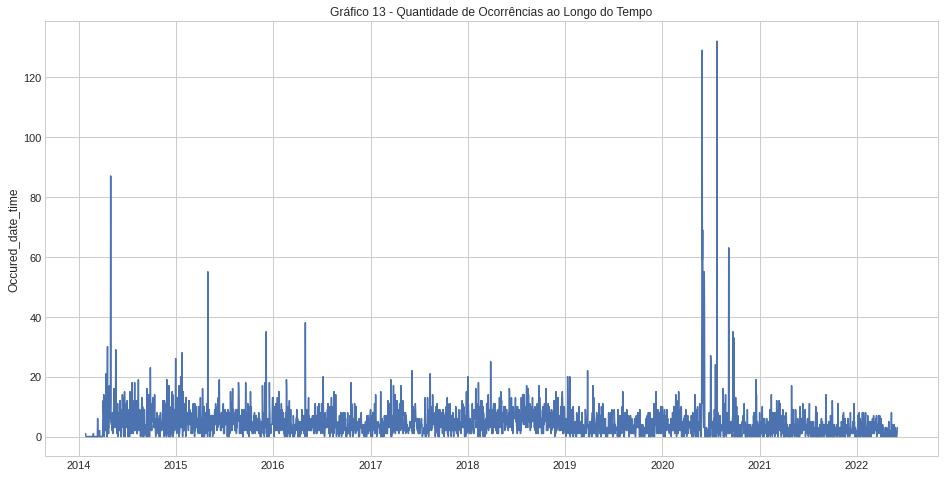

In [138]:
plt.figure(figsize=(16,8))
plt.style.use('seaborn-whitegrid')

sns.lineplot(data=df_qtde_ocorrencias)
plt.title('Gráfico 13 - Quantidade de Ocorrências ao Longo do Tempo')

plt.show()

> Observa-se que houveram picos característicos em todos os anos, que podem indicar uma sazonalidade. No ano de 2020 houve um salto significativo no número de ocorrências em determinados momentos do ano, com picos que se destacam em relação aos outros anos. Sugere-se um estudo mais aprofundado deste ano, que estava sob contexto de lockdown devido a pandemia de Covid-19. A média de ocorrências de uso da força não oscila significamente.

 * Estudo do número de ocorrência de uso da força em cada ano</b>

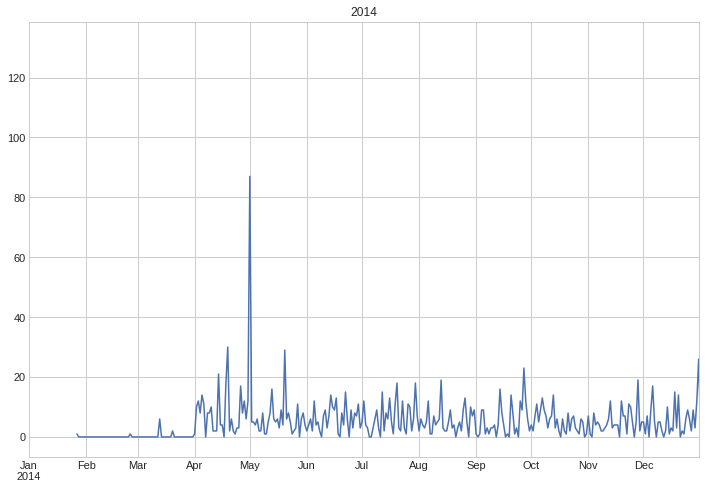

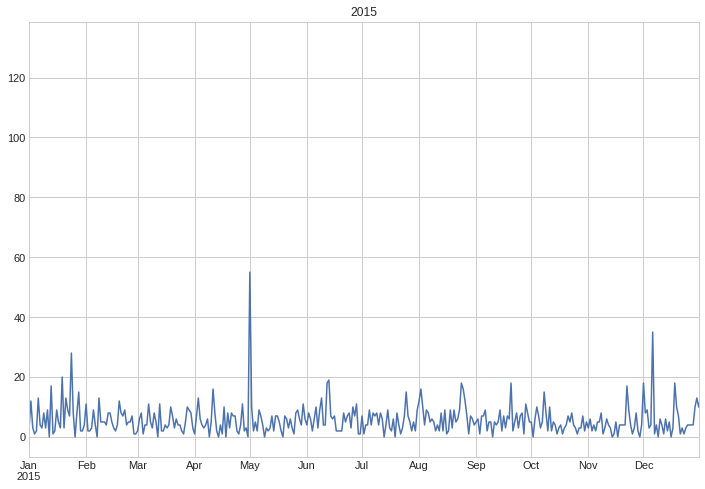

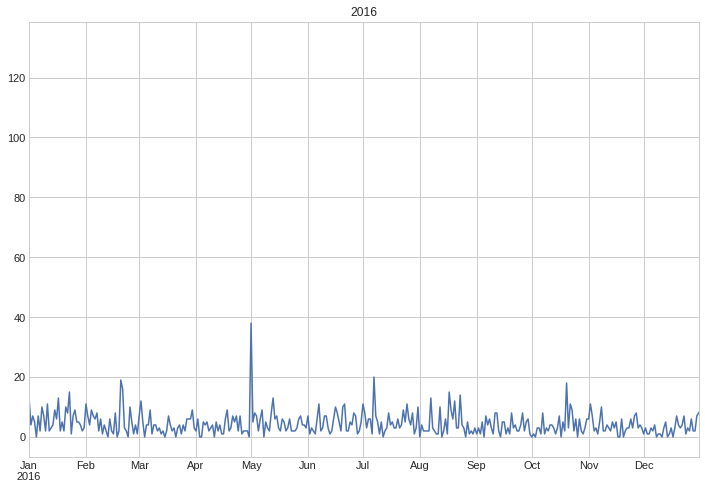

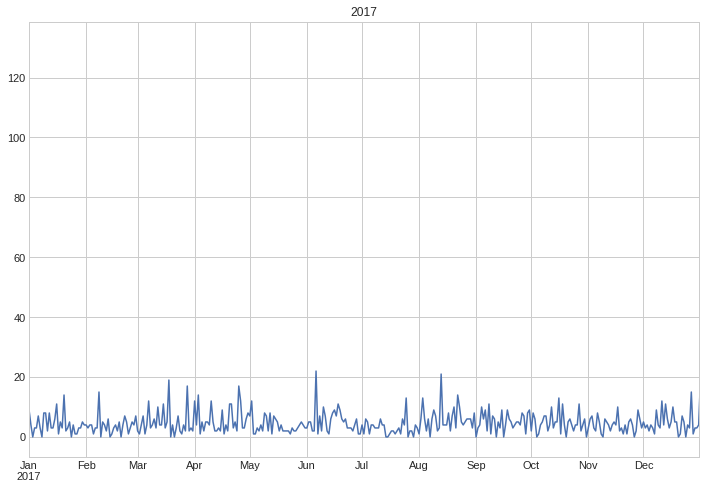

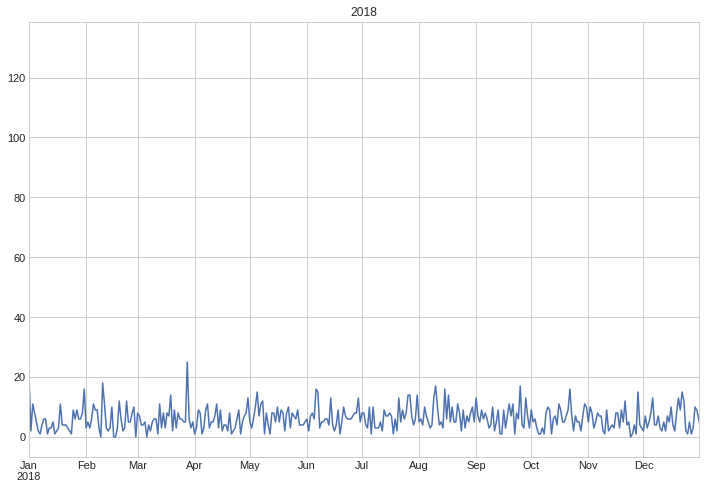

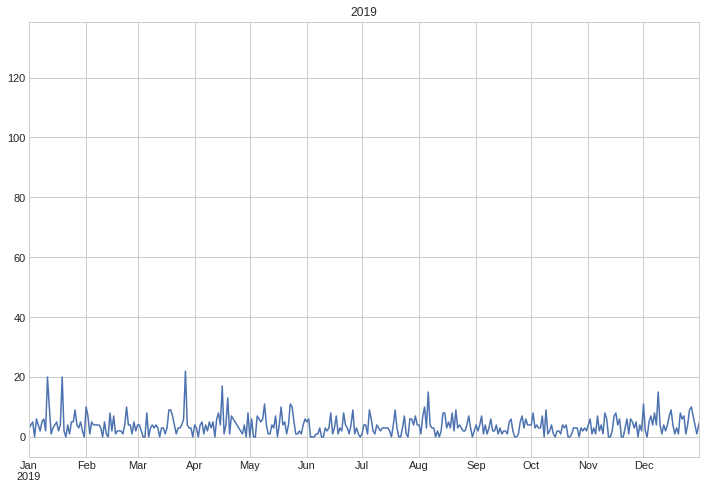

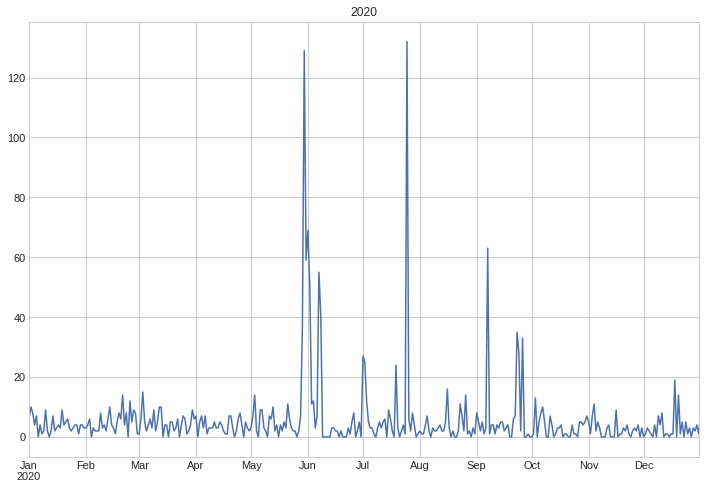

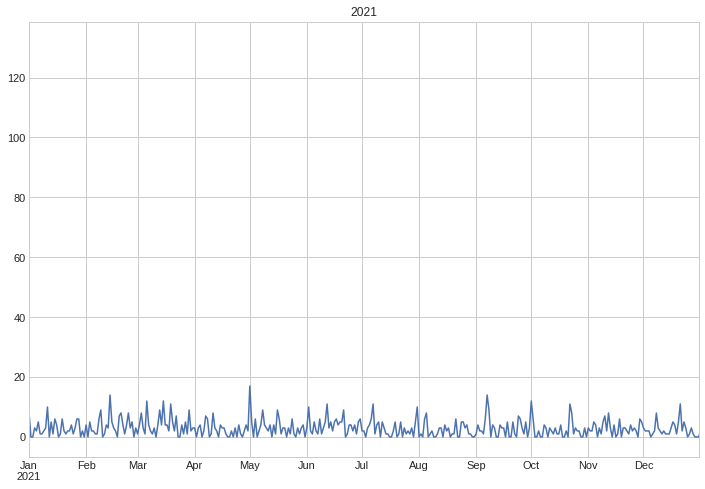

In [139]:
anos=['2014','2015','2016','2017','2018','2019','2020','2021']

for ano in anos:
  df_qtde_ocorrencias.plot(figsize=(12,8))
  plt.title(ano)
  plt.xlim([ano+'-01-01', ano+'-12-31'])
  plt.show()

> Nota-se picos característicos no começo de maio até o ano de 2016, com tendência de diminuição da quantidade de ocorrências até 2020. Em 2020 há um fenômeno de picos consideráveis de casos, entre junho e outubro. Entretanto, no ano de 2021 há uma tendência de queda em relação ao ano anterior e com uma média constante de ocorrências de uso da força.

* Componentes da série temporal

> Para uma avaliação mais precisa da série temporal, vamos utilizar um método que decompõe entre a tendência e sazonalidade. Foram escolhidos anos com características bem distantes entre si: 2018, 2020 e o comportamento em 2021, após os recordes de ocorrência de uso de força em 2020.

Decomposição da série de 2018


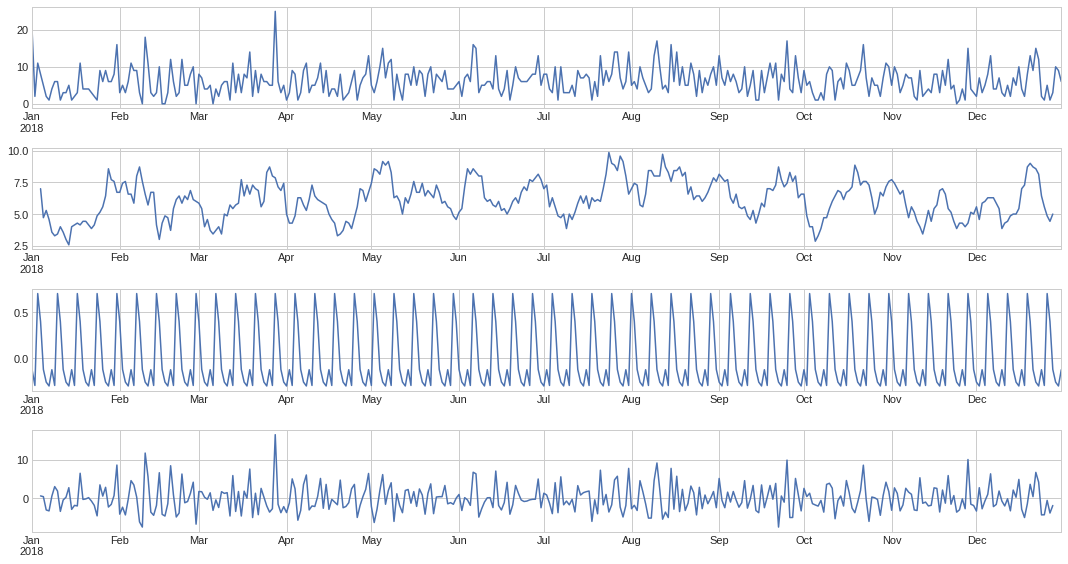

In [140]:
from statsmodels.tsa.seasonal import seasonal_decompose

ano='2018'

# DataFrame que restringe o ano de 2018
df_qtde_ano= df_qtde_ocorrencias[(df_qtde_ocorrencias.index >= '01-01-'+ano) & 
                            (df_qtde_ocorrencias.index <= '12-31-'+ano)]

# Plot da decomposição
result = seasonal_decompose(df_qtde_ano)
print('Decomposição da série de {}'.format(ano))


fig, (ax1,ax2,ax3, ax4) = plt.subplots(4,1, figsize=(15,8))

# Observação original
result.observed.plot(ax=ax1)
# Tendência
result.trend.plot(ax=ax2)
# Sazonalidade
result.seasonal.plot(ax=ax3)
# Residual
result.resid.plot(ax=ax4)

plt.tight_layout()

Decomposição da série de 2020


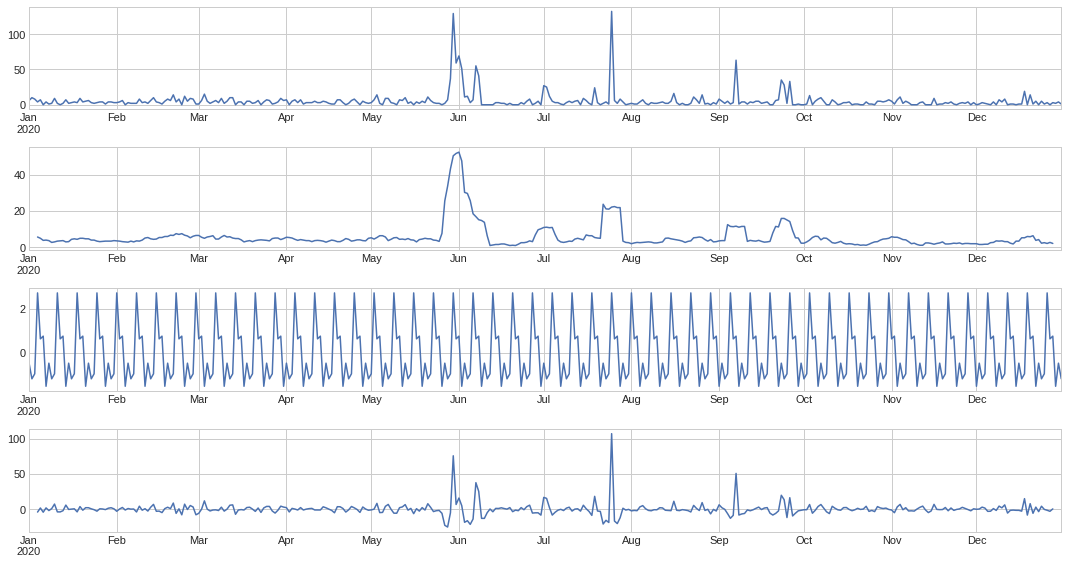

In [141]:
from statsmodels.tsa.seasonal import seasonal_decompose

ano='2020'

df_qtde_ano= df_qtde_ocorrencias[(df_qtde_ocorrencias.index >= '01-01-'+ano) & 
                            (df_qtde_ocorrencias.index <= '12-31-'+ano)]

result = seasonal_decompose(df_qtde_ano)
print('Decomposição da série de {}'.format(ano))

fig, (ax1,ax2,ax3, ax4) = plt.subplots(4,1, figsize=(15,8))
result.observed.plot(ax=ax1)
result.trend.plot(ax=ax2)
result.seasonal.plot(ax=ax3)
result.resid.plot(ax=ax4)

plt.tight_layout()

Decomposição da série de 2021


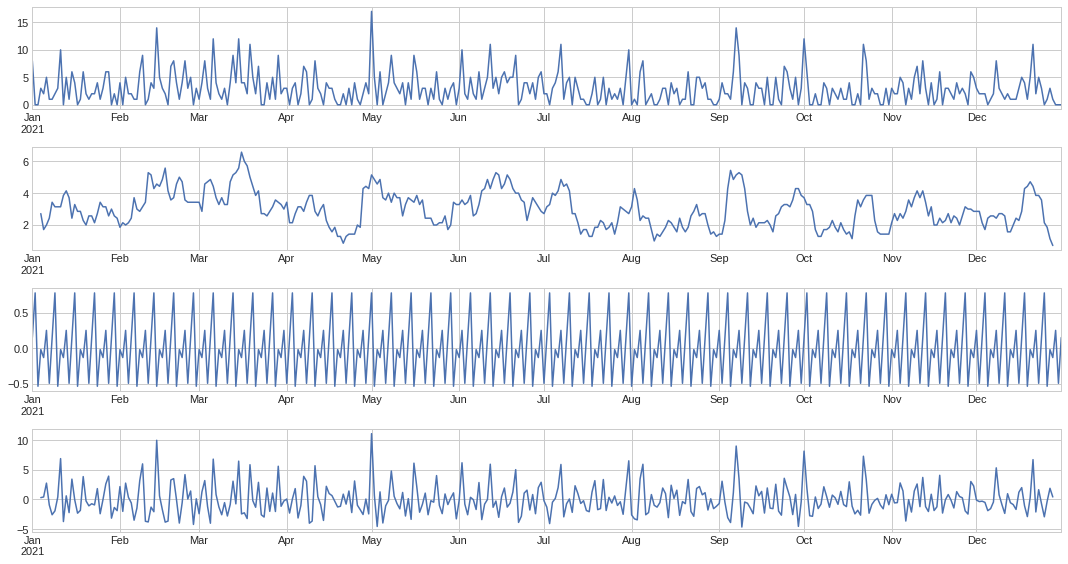

In [142]:
from statsmodels.tsa.seasonal import seasonal_decompose

ano='2021'

df_qtde_ano= df_qtde_ocorrencias[(df_qtde_ocorrencias.index >= '01-01-'+ano) & 
                            (df_qtde_ocorrencias.index <= '12-31-'+ano)]

result = seasonal_decompose(df_qtde_ano)
print('Decomposição da série de {}'.format(ano))

fig, (ax1,ax2,ax3, ax4) = plt.subplots(4,1, figsize=(15,8))
result.observed.plot(ax=ax1)
result.trend.plot(ax=ax2)
result.seasonal.plot(ax=ax3)
result.resid.plot(ax=ax4)

plt.tight_layout()

> A irregularidade durante os meses de junho a agosto no ano de 2020 é facilmente observada pela linha de tendência.

* Estudo da estacionariedade


Uma série temporal estacionária é aquela em que suas propriedades estatísticas, como a média, a variância e a auto correlação, são constantes ao longo do tempo. Isto significa que suas propriedades não variam com o tempo.

Para comprovar ou refutar a estacionariedade da série que representa o número de ocorrências do uso da força no tempo, será utilizado o Teste ADF ( Augmented Dickey-Fuller), que tem a capacidade de mostrar se uma série é ou não estacionária.

Assume-se:
- Hipótese Nula (H0) de que a série não é estacionária.

- Hipótese Alternativa (H1) que rejeita a hipótese nula, ou seja, a série é estacionária.

Quanto menor o p-value apresentado, mais se rejeitará a hipótese nula.

In [143]:
# Estudo da Estacionariedade por teste ADF

from statsmodels.tsa.stattools import adfuller

X = df_qtde_ocorrencias.values

result = adfuller(X)
print('Teste Dickey-Fuller Aumentado')
print('Teste Estatístico: {:.4f}'.format(result[0]))
print('Valor-p: {:.4f}'.format(result[1]))
print('Valores Críticos:')
for key, value in result[4].items():
	print('\t{}: {:.4f}'.format(key, value))

Teste Dickey-Fuller Aumentado
Teste Estatístico: -8.3487
Valor-p: 0.0000
Valores Críticos:
	1%: -3.4325
	5%: -2.8625
	10%: -2.5673


Como o teste estatístico é menor que os valores críticos e o p-value é praticamente 0, a hipótese de que a série é estacionária se valida, podendo-se aplicar alguns modelos de forecasting que assumem essa condição.

> * Média móvel e desvio padrão

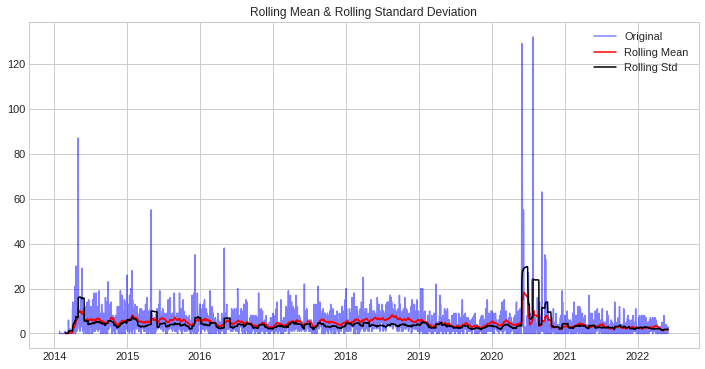

In [144]:
# Definindo a janela de 30 dias para a média e desvio padrão
rolling_mean = df_qtde_ocorrencias.rolling(window=30).mean()
rolling_std = df_qtde_ocorrencias.rolling(window=30).std()

fig, ax = plt.subplots(figsize=(12,6))

# Plots da série temporal observada, da média em vermelho e do d.p em preto
plt.plot(df_qtde_ocorrencias, color = 'blue', label = 'Original', alpha=0.5)
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')

# Customização
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

###### <b> 3.4.6 Qual o percentual de casos reincidentes em relação ao total de incidentes em cada setor?

O primeiro passo é criar um dataframe como informações a respeito da reincidência e incidentes em cada um dos setores

In [173]:
setores = list(list(df['Sector'].value_counts().index))
incidentes_totais = []
reincidentes = []
perc_reincidentes = []
incidentes_level_1 = []
incidentes_level_2 = []
incidentes_level_3 = []
incidentes_level_3_ois = []

for setor in setores:

  df_id_subjects_unicos = df[df['Sector']==setor]['Subject_ID'].value_counts()

  # Incidentes totais no setor
  inc_setor = len(df[df['Sector']==setor])
  incidentes_totais.append(inc_setor)

  # Reincidentes totais no setor
  reic_setor = (df_id_subjects_unicos.values >= 2).sum()
  reincidentes.append(reic_setor)

  # Percentual de reincidentes no setor
  perc_reincidentes_setor = reic_setor/inc_setor*100
  perc_reincidentes.append(perc_reincidentes_setor)

  # Incidentes totais do nível 1 no setor
  df_setor = df.loc[df['Sector']==setor]
  incidentes_level_1_setor = len(df_setor.loc[df_setor['Incident_Type'] == 'Level 1 - Use of Force'])
  incidentes_level_1.append(incidentes_level_1_setor)

  # Incidentes totais do nível 2 no setor
  incidentes_level_2_setor = len(df_setor.loc[df_setor['Incident_Type'] == 'Level 2 - Use of Force'])
  incidentes_level_2.append(incidentes_level_2_setor)

  # Incidentes totais do nível 3 no setor
  incidentes_level_3_setor = len(df_setor.loc[df_setor['Incident_Type'] == 'Level 3 - Use of Force'])
  incidentes_level_3.append(incidentes_level_3_setor)

  # Incidentes totais do nível 3 (OIS) no setor
  incidentes_level_3_ois_setor = len(df_setor.loc[df_setor['Incident_Type'] == 'Level 3 - OIS'])
  incidentes_level_3_ois.append(incidentes_level_3_ois_setor)

d = {'sector':setores, 'incidentes_totais':incidentes_totais, 'reincidentes':reincidentes,
'percentual_reincidentes':perc_reincidentes, 'incidentes_level1':incidentes_level_1,
'incidentes_level2':incidentes_level_2, 'incidentes_level3':incidentes_level_3,
'incidentes_level3_OIS':incidentes_level_3_ois}

df_setores_reincidencia = pd.DataFrame(data=d)
df_setores_reincidencia.head()

,sector,incidentes_totais,reincidentes,percentual_reincidentes,incidentes_level1,incidentes_level2,incidentes_level3,incidentes_level3_OIS
0,EDWARD,1738,312,17.951669,903,819,12,4
1,KING,1505,299,19.867110,1021,462,14,8
2,DAVID,1049,214,20.400381,704,314,22,9
3,MARY,998,209,20.941884,550,431,15,2
4,SAM,947,182,19.218585,745,177,8,17


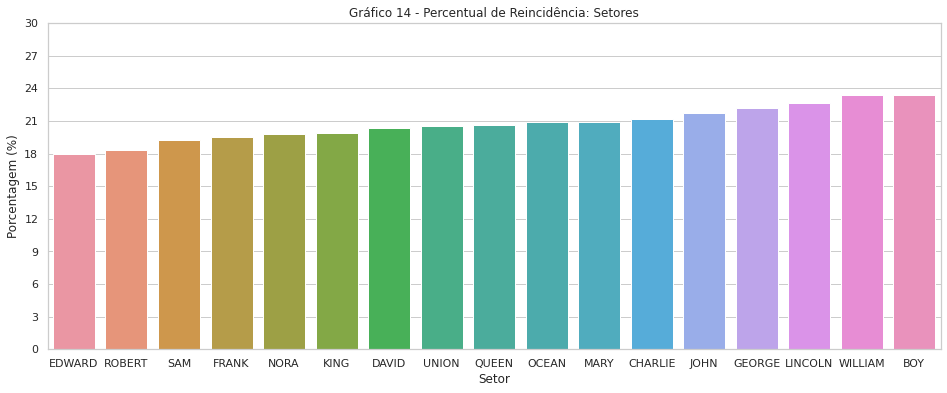

In [207]:
# Plot do percentual de reincidência em da um dos setores 

# Definindo o tamanho do gráfico
ax = plt.subplots(figsize=(16, 6))

# Gráfico de barras 
sns.barplot(y='percentual_reincidentes', data=df_setores_reincidencia.sort_values(by='percentual_reincidentes'), x='sector')

# Customização do gráfico
plt.title('Gráfico 14 - Percentual de Reincidência: Setores')
plt.xlabel('Setor')
plt.ylabel('Porcentagem (%)')
sns.set_color_codes("pastel")
plt.yticks(ticks=np.arange(0,31,3))

plt.show()

> O percentual de reincidentes entre os setores tem uma baixa variância.

* Correlação geral entre a reincidência e níveis de incidentes em cada setor

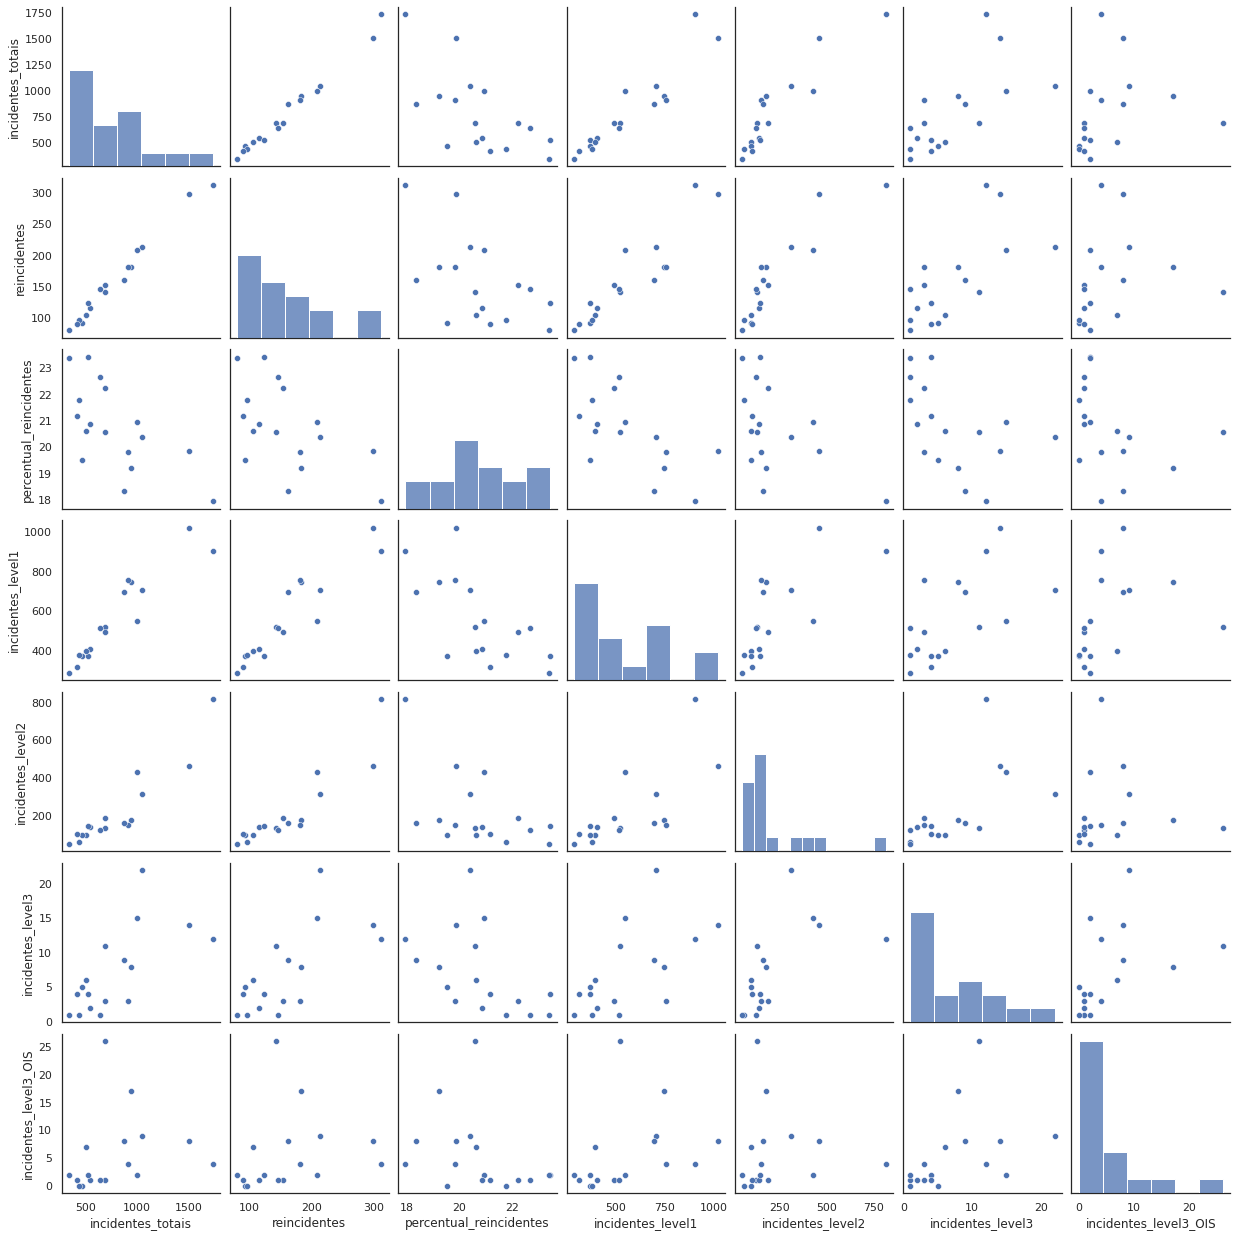

In [214]:
# Scatterplot das colunas do dataframe formado
sns.set_style('white')
sns.pairplot(df_setores_reincidencia, palette='pastel')
plt.show()

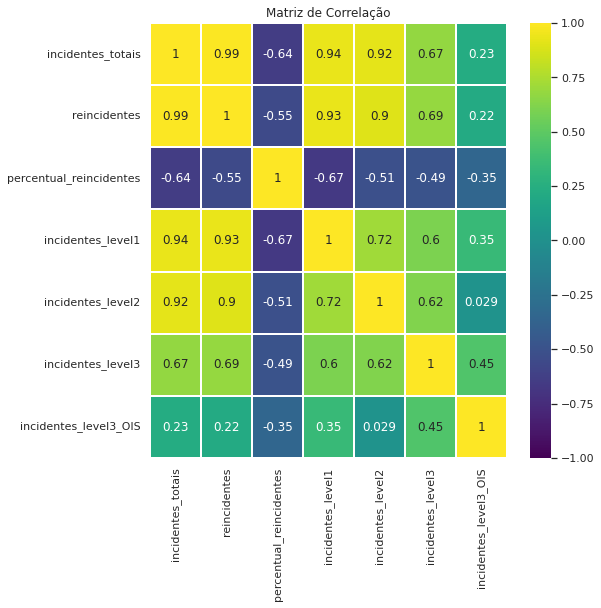

In [212]:
# Matriz de correlação entre as colunas do dataframe formado
plt.figure(figsize=(8,8))
sns.heatmap(df_setores_reincidencia.corr(), vmin=-1, vmax=1, cmap='viridis', annot=True,linewidths=1)
plt.title('Matriz de Correlação')
plt.show()

* Correlação entre a quantidade de reincidentes e uso da força nível 2

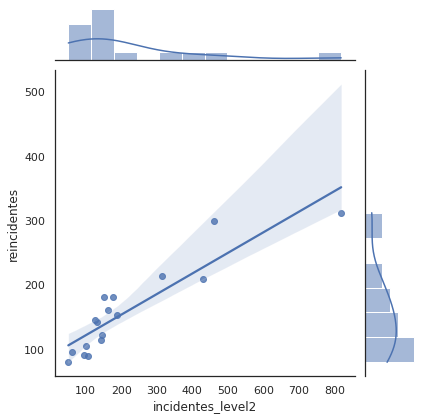

In [217]:
sns.jointplot(x='incidentes_level2',y='reincidentes',data=df_setores_reincidencia,kind='reg')
plt.show()

> Nota-se uma alta correlação positiva entre a quantidade de reincidentes nos setores e o uso da força nível 2. Um retrato que pode ser feito é de que as pessoas reincidentes geralmente são as que mais sofrem medidas mais duras de contenção.

#### <b> 4. Pré-processamento dos Dados </b>

###### <b>4.1 Remoção de valores ausentes</b>

O primeiro passo será a remoção de dados ausentes, devido ao percentual dos valores em relação ao dataset. A priori a ideia era substituir os valores ausentes da coluna com dados de outras fontes. Encontrou-se um [dataset](https://www.fbi.gov/services/cjis/ucr/use-of-force) do FBI que trata do uso da força nos estados que compõem os EUA, mas as informações trazidas por este dataset não complementam o conjunto de dados utilizado neste estudo.

In [ ]:
# Porcentagem atual de dados ausentes
porcentagem_faltantes = df.isna().sum()/len(df)*100
porcentagem_faltantes 

ID                   0.000000
Incident_Num         0.000000
Incident_Type        0.000000
Occured_date_time    0.000000
Precinct             6.667134
Sector               6.667134
Beat                 6.667134
Officer_ID           0.000000
Subject_ID           0.000000
Subject_Race         0.000000
Subject_Gender       3.715648
dtype: float64

In [ ]:
# Remoção dos missing values
df.dropna(axis=0, inplace=True)
porcentagem_faltantes = df.isna().sum()/len(df)*100
porcentagem_faltantes 

ID                   0.0
Incident_Num         0.0
Incident_Type        0.0
Occured_date_time    0.0
Precinct             0.0
Sector               0.0
Beat                 0.0
Officer_ID           0.0
Subject_ID           0.0
Subject_Race         0.0
Subject_Gender       0.0
dtype: float64

##### <b> 4.2 Tratamento de Variáveis Categóricas </b>

###### <b> 4.2.1 Variáveis categóricas do tipo ordinal </b>

Para este tipo de variável categóricas será realizada a substituição por um valor numérico crescente.

In [ ]:
df.loc[df.Incident_Type=='Level 1 - Use of Force','Incident_Type']=1
df.loc[df.Incident_Type=='Level 2 - Use of Force','Incident_Type']=2
df.loc[df.Incident_Type=='Level 3 - Use of Force','Incident_Type']=3
df.loc[df.Incident_Type=='Level 3 - OIS','Incident_Type']=4

###### <b>4.2.2 Variáveis categóricas do tipo nominal</b> 

Será implementada o uso da técnica One-Hot Encoding, uma vez que estas variáveis não podem representar um número contável ou que seja possível ordená-los entre si, pois realizar a mesma transformação da célula anterior enviesaria os modelos de Machine Learning.

In [ ]:
df_var_cat = df[['Precinct','Sector','Beat','Subject_Race','Subject_Gender']]

In [ ]:
# Formação do One-Hot Encoding
df_Precinct_encoded =  pd.get_dummies(df_var_cat.iloc[:,0])
df_Sector_encoded =  pd.get_dummies(df_var_cat.iloc[:,1])
df_Beat_encoded = pd.get_dummies(df_var_cat.iloc[:,2])
df_Subject_Race_encoded = pd.get_dummies(df_var_cat.iloc[:,3])
df_Subject_Gender_encoded = pd.get_dummies(df_var_cat.iloc[:,4])

# Formação do DataFrame com as colunas, após a etapa de encoder
df_without_cat = df[['ID','Incident_Num','Incident_Type','Officer_ID','Subject_ID','Occured_date_time']]
df_encoded = df_without_cat.join(df_Precinct_encoded)
df_encoded = df_encoded.join(df_Sector_encoded)
df_encoded = df_encoded.join(df_Beat_encoded)
df_encoded = df_encoded.join(df_Subject_Race_encoded)
df_encoded = df_encoded.join(df_Subject_Gender_encoded)

##### <b> 4.3 Feature Selection </b>

Serão removidas as colunas que não são importantes para o treinamento do modelo de Machine Learning, como por exemplo as chaves ID. Outras técnicas podem ser aplicadas para seleção das features, mas ficarão como trabalho futuro.

In [ ]:
df_final = df_encoded.drop(columns=['ID','Incident_Num','Occured_date_time'])

In [ ]:
df_final.columns

Index(['Incident_Type', 'Officer_ID', 'Subject_ID', 'East', 'North', 'South',
       'Southwest', 'West', 'BOY', 'CHARLIE', 'DAVID', 'EDWARD', 'FRANK',
       'GEORGE', 'JOHN', 'KING', 'LINCOLN', 'MARY', 'NORA', 'OCEAN', 'QUEEN',
       'ROBERT', 'SAM', 'UNION', 'WILLIAM', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3',
       'D1', 'D2', 'D3', 'E1', 'E2', 'E3', 'F1', 'F2', 'F3', 'G1', 'G2', 'G3',
       'J1', 'J2', 'J3', 'K1', 'K2', 'K3', 'L1', 'L2', 'L3', 'M1', 'M2', 'M3',
       'N1', 'N2', 'N3', 'O1', 'O2', 'O3', 'Q1', 'Q2', 'Q3', 'R1', 'R2', 'R3',
       'S1', 'S2', 'S3', 'U1', 'U2', 'U3', 'W1', 'W2', 'W3',
       'American Indian/Alaska Native', 'Asian', 'Black or African American',
       'Hispanic or Latino', 'Nat Hawaiian/Oth Pac Islander', 'Not Specified',
       'Two or More Races', 'White', 'Female', 'Male', 'Non-binary', 'Other',
       'Transgender Female', 'Transgender Male'],
      dtype='object')

##### <b> 4.4 Normalização e/ou Padronização  dos dados </b>

In [ ]:
# Primeiro serão testados os modelos sem esta etapa, uma vez que os modelos escolhidos se comportam bem sem ela.

#### <b> 5. Separação entre Treino e Teste </b>

Nesta etapa serão separados os conjuntos de treino e teste,  onde 25% dos dados irão compor o dataset de teste. A variável dependente (Y) será o tipo do incidente (Level 1, Level 2, Level 3 e Level 3 - OIS), representados pelos números 1, 2, 3 e 4 respectivamente, conforme substituidos na etapa de codificação das variáveis categóricas.

In [ ]:
from sklearn.model_selection import train_test_split

X = df_final.drop(columns=['Incident_Type'])
y = df_final['Incident_Type']
y=y.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.75)

#### <b> 6. Modelos de Classificação </b>

Foram escolhidos 2 modelos para esta primeira fase de teste. A Árvore de Decisão e Support Vector Machines (SVM). Ambos os modelos são capazes de realizar a classificação multiclasse. As Árvores de Decisão não demandam muita preparação dos dados e têm como vantagem ser um modelo "caixa-branca", ou seja, será extremamente importante para conhecer sua interpretabilidade uma vez que o dataset é composto por dados sensíveis como etnia e gênero. As Support Vector Machines aplicam o conceito matemático de kernel, que conseguem lidar bem com não linearidades.

Para entendimento teórico-matemático dos modelos, recomenda-se a leitura:

[Documentação Decision Trees](https://scikit-learn.org/stable/modules/tree.html)

[Documentação SVM](https://scikit-learn.org/stable/modules/svm.html#)

###### <b>6.1 Árvores de Decisão</b>

In [ ]:
# Árvores de Decisão
from sklearn import tree
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report

# Aplicação do modelo puro, sem ajuste dos parâmetros
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)


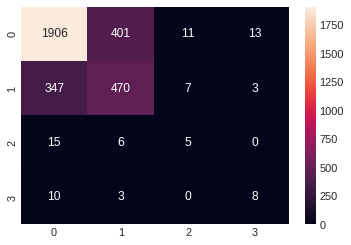

In [ ]:
# Resultados do modelo
y_true = y_test
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_true,y_pred)

sns.heatmap(cm,annot=True,fmt='.0f')

plt.show()

> A classes foram codificadas como:

* Level 1 - 0
* Level 2 - 1
* Level 3 - 2
* Level 3 (OIS) - 3

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           1       0.84      0.82      0.83      2331
           2       0.53      0.56      0.54       827
           3       0.19      0.19      0.19        26
           4       0.36      0.38      0.37        21

    accuracy                           0.75      3205
   macro avg       0.48      0.49      0.48      3205
weighted avg       0.75      0.75      0.75      3205



Apesar de uma acurácia alta, o modelo obteve erros significativos em classes menos presentes no dataset (os níveis mais altos de uso da força)

###### <b> 6.2 Support Vector Machines </b>

In [ ]:
%%time
from sklearn import svm

# Aplicando o classificador com kernel RBF e C=1000
clf = svm.SVC(kernel='rbf', gamma=0.05, C=1000)

clf.fit(X_train,y_train)

CPU times: user 52 s, sys: 442 ms, total: 52.4 s
Wall time: 1min 3s


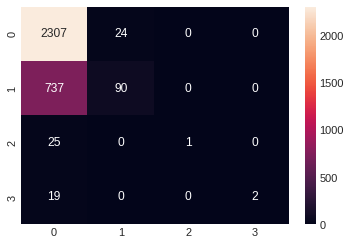

In [ ]:
# Resultados do modelo SVM
y_true = y_test
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_true,y_pred)

sns.heatmap(cm,annot=True,fmt='.0f')

plt.show()

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           1       0.75      0.99      0.85      2331
           2       0.79      0.11      0.19       827
           3       1.00      0.04      0.07        26
           4       1.00      0.10      0.17        21

    accuracy                           0.75      3205
   macro avg       0.88      0.31      0.32      3205
weighted avg       0.76      0.75      0.67      3205



Decision Trees performou melhor neste primeiro teste. Fica como trabalho futuro um ajuste dos parâmetros através do Grid Search e aplicação de Cross Validation.

#### <b> 7. Estratégias de Melhorias no Desempenho dos Modelos </b>

Será aplicada a estratégia de Undersampling, que consiste em diminuir a quantidade de amostras da classe majoritária, diminuindo a diferença entre as categorias de nível de uso da força. A técnica de Undersampling escolhida foi a One Sided Selection.

In [ ]:
# Balanceamento dos dados

from imblearn.under_sampling import RandomUnderSampler, NearMiss, OneSidedSelection

# OneSidedSelection (Algoritmo tipo KNN)
oss = OneSidedSelection(random_state = 32)
X_oss_res, y_oss_res = oss.fit_resample(X_train, y_train)

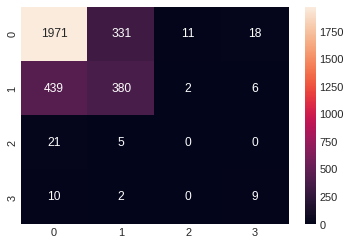

              precision    recall  f1-score   support

           1       0.81      0.85      0.83      2331
           2       0.53      0.46      0.49       827
           3       0.00      0.00      0.00        26
           4       0.27      0.43      0.33        21

    accuracy                           0.74      3205
   macro avg       0.40      0.43      0.41      3205
weighted avg       0.73      0.74      0.73      3205



In [ ]:
# Árvores de Decisão
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_oss_res, y_oss_res)

y_true = y_test
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_true,y_pred)

sns.heatmap(cm,annot=True,fmt='.0f')

plt.show()

print(classification_report(y_true, y_pred))

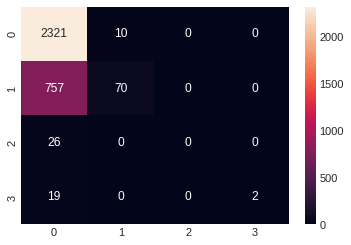

              precision    recall  f1-score   support

           1       0.74      1.00      0.85      2331
           2       0.88      0.08      0.15       827
           3       0.00      0.00      0.00        26
           4       1.00      0.10      0.17        21

    accuracy                           0.75      3205
   macro avg       0.65      0.29      0.29      3205
weighted avg       0.77      0.75      0.66      3205



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Support Vector Machines
from sklearn import svm

clf = svm.SVC(kernel='rbf', gamma=0.05, C=1000)

clf.fit(X_oss_res,y_oss_res)

y_true = y_test
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_true,y_pred)

sns.heatmap(cm,annot=True,fmt='.0f')

plt.show()

print(classification_report(y_true, y_pred))

#### <b> 8. Trabalhos Futuros </b>

* Refatoração do código: aplicar automações e pipelines.

* Uso de modelos para forecasting do uso de força na série temporal;

* Uso de ANOVA para análise de correlação entre as variáveis categóricas;

* Aplicar técnicas de Escalonamentos dos Dados e Feature Selection;

* Aplicar GridSearchCV para encontrar os melhores parâmetros;

* Aplicar outras técnicas de balanceamento dos dados;

* Aplicar técnicas de Deep Learning buscando melhoria na performance da classificação.

<b> Obrigado! </b>

---